<a href="https://colab.research.google.com/github/Mystic6303/ML-DL-projects/blob/main/Linear_Regression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("HousingData.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
print(df.isnull().sum())
print(round((df.isnull().sum()/df.shape[0])*100,2))

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
CRIM       3.95
ZN         3.95
INDUS      3.95
CHAS       3.95
NOX        0.00
RM         0.00
AGE        3.95
DIS        0.00
RAD        0.00
TAX        0.00
PTRATIO    0.00
B          0.00
LSTAT      3.95
MEDV       0.00
dtype: float64


In [9]:
df1 = df.fillna(df.mean())
print(df1.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [13]:
#to find correlation
correlation_matrix=df1.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       -0.370163  0.167431 

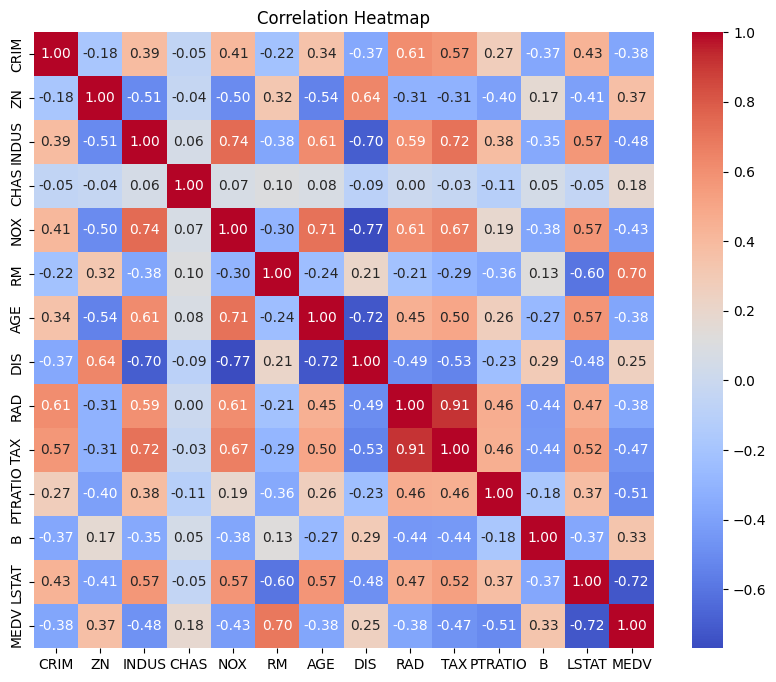

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df1=df1.drop(columns='CHAS')
#correlation isnt much for CHAS so we can drop it.

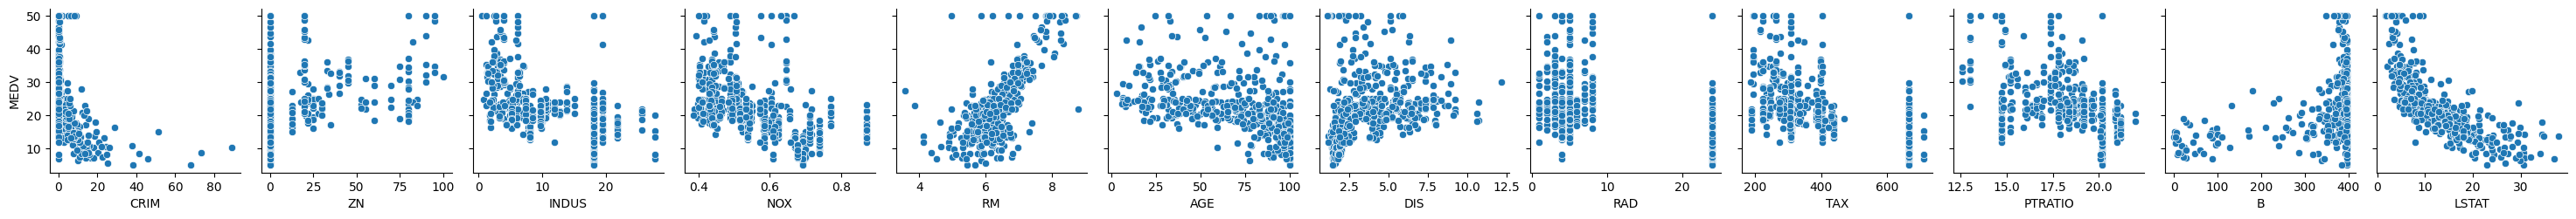

In [24]:
sns.pairplot(df, x_vars=df1.columns[:-1], y_vars=['MEDV'])
plt.show()

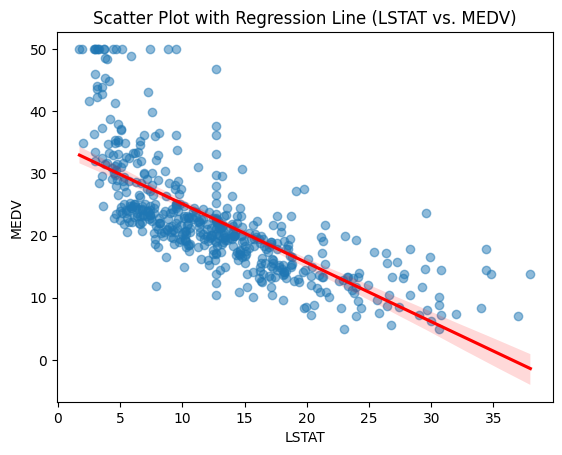

In [26]:
sns.regplot(x='LSTAT', y='MEDV', data=df1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line (LSTAT vs. MEDV)')
plt.show()

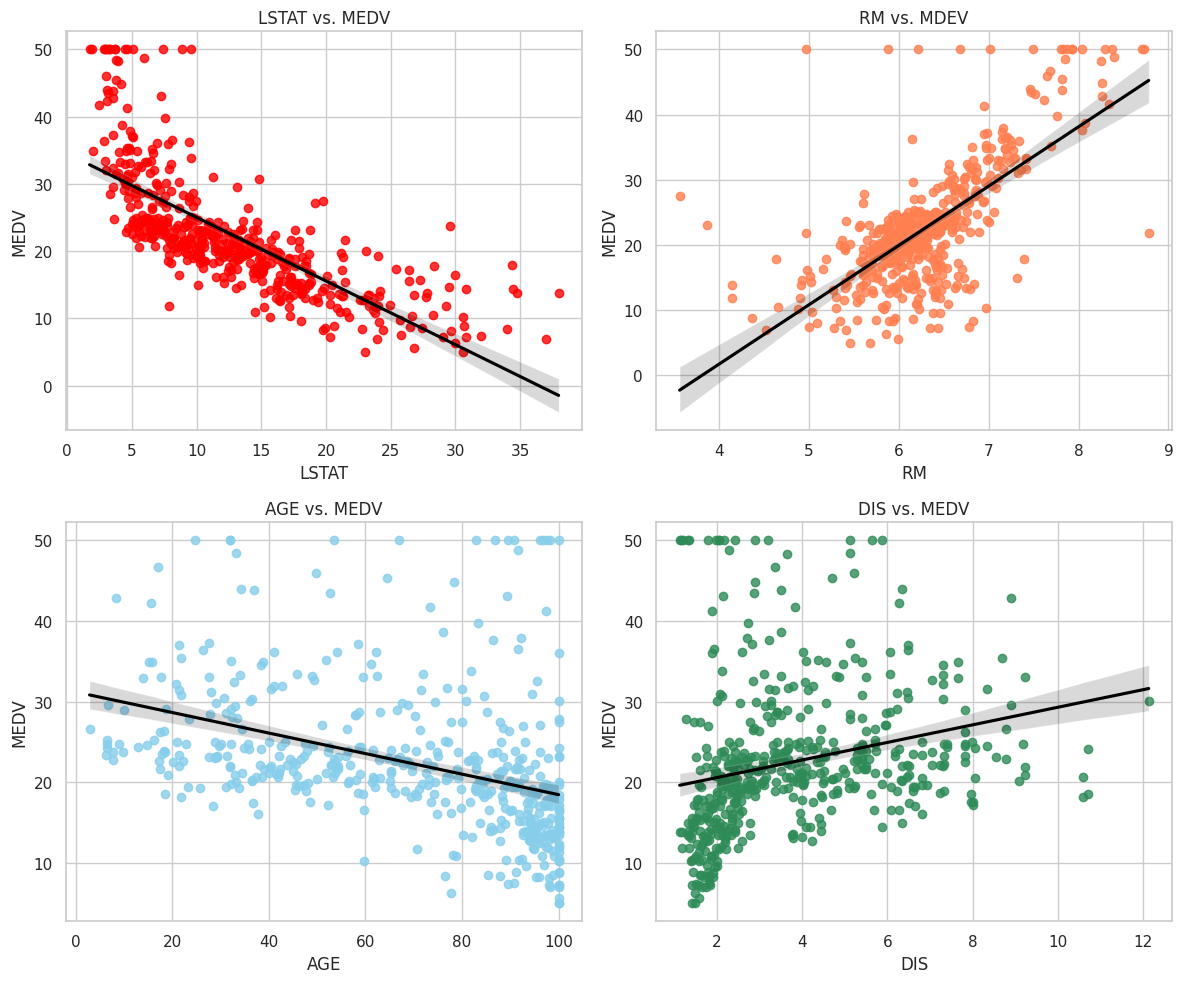

In [40]:
#to create subplot grids of lmplots
sns.set_theme(style="whitegrid")
sns.set_context("notebook")
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
#subplot 1:
sns.regplot(x='LSTAT', y='MEDV', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'black'}, ax=axes[0, 0])
axes[0, 0].set_title('LSTAT vs. MEDV')
#subplot 1:
sns.regplot(x='RM', y='MEDV', data=df, scatter_kws={'color': 'coral'}, line_kws={'color': 'black'}, ax=axes[0, 1])
axes[0, 1].set_title('RM vs. MDEV')
#subplot 1:
sns.regplot(x='AGE', y='MEDV', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'black'}, ax=axes[1, 0])
axes[1, 0].set_title('AGE vs. MEDV')
#subplot 1:
sns.regplot(x='DIS', y='MEDV', data=df, scatter_kws={'color': 'seagreen'}, line_kws={'color': 'black'}, ax=axes[1, 1])
axes[1, 1].set_title('DIS vs. MEDV')
# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1200x2000 with 0 Axes>

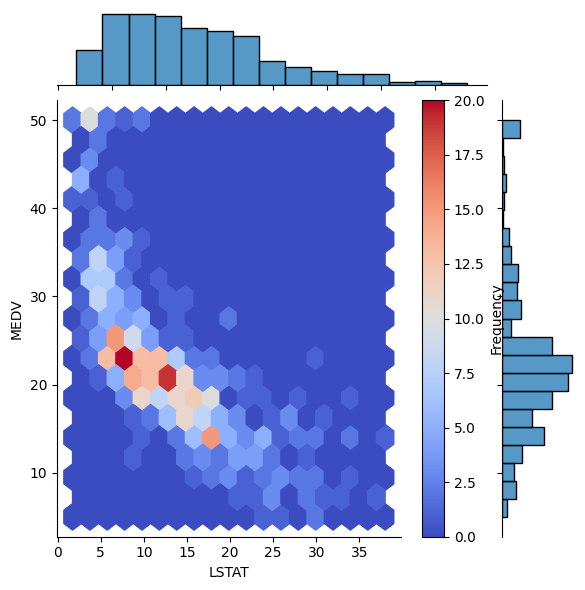

In [39]:
# Hexbin Plot with Marginal Histograms
plt.figure(figsize=(12, 20))
hexbin = sns.jointplot(x='LSTAT', y='MEDV', kind='hex', data=df, cmap='coolwarm')

# Set axis labels and plot title
hexbin.set_axis_labels('LSTAT', 'MEDV')
plt.colorbar(mappable=hexbin.ax_joint.collections[0], label='Frequency')
plt.show()

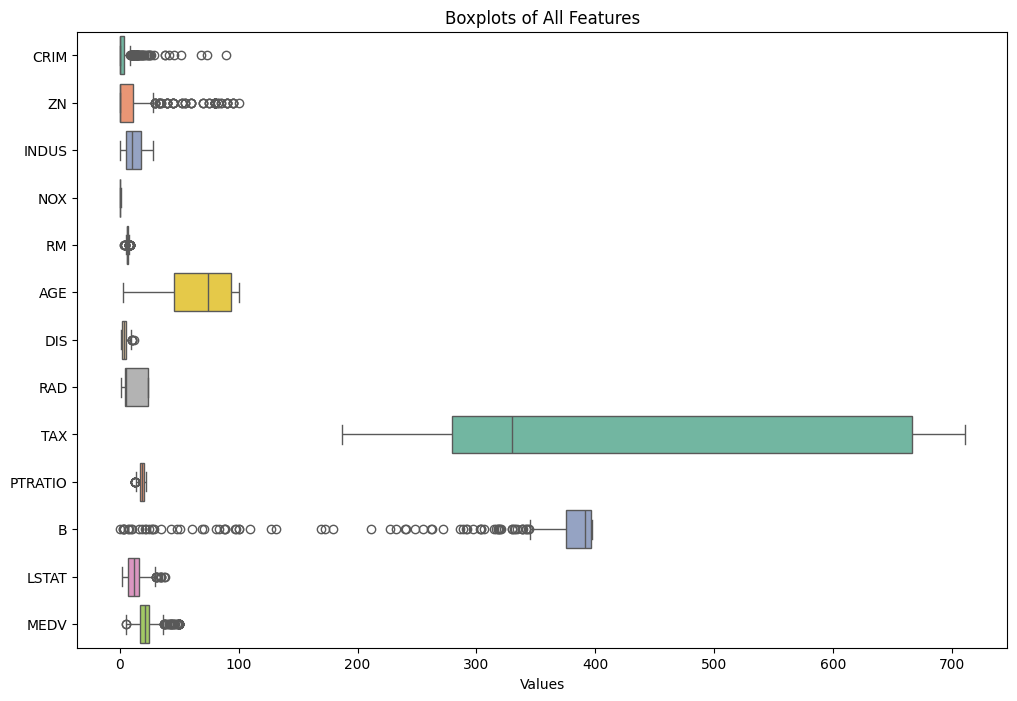

In [25]:
#to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, orient="h", palette="Set2")
plt.title('Boxplots of All Features')
plt.xlabel('Values')
plt.show()

In [41]:
#To remove outliers using zscore method
"""The Z-score method measures how far a data point is from the mean, expressed in terms of standard deviations. A high absolute Z-score indicates an outlier. The threshold for identifying outliers is typically set at 2 or 3.
The formula for calculating the Z score of a data point x is:
Z=(x−μ)/σ
where:
x is the data point
μ (mu) is the mean (average) of the dataset
σ (sigma) is the standard deviation of the dataset
Determine a threshold for outliers, usually in terms of the number of standard deviations away from the mean. A common threshold is +/- 2 or 3 standard deviations, depending on how conservative or aggressive you want to be in identifying outliers.
This means that any data point with a Z score less than -2 or greater than 2 (or -3 and 3, if using a more conservative threshold) would be considered an outlier."""
from scipy import stats
zscore=np.abs(stats.zscore(df1))
zscore

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.422328,0.296443,1.311010,0.144217,0.413672,1.210593e-01,0.140214,0.982843,0.666608,1.459000,0.441052,1.104146,0.159686
1,0.419870,0.489639,0.599771,0.740262,0.194274,3.787156e-01,0.557160,0.867883,0.987329,0.303094,0.441052,0.510353,0.101524
2,0.419872,0.489639,0.599771,0.740262,1.282714,2.706270e-01,0.557160,0.867883,0.987329,0.303094,0.396427,1.239748,1.324247
3,0.419277,0.489639,1.330435,0.835284,1.016303,8.287698e-01,1.077737,0.752922,1.106115,0.113032,0.416163,1.395333,1.182758
4,0.414981,0.489639,1.330435,0.835284,1.228577,5.223385e-01,1.077737,0.752922,1.106115,0.113032,0.441052,0.000000,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.415733,0.489639,0.126411,0.158124,0.439316,2.121240e-02,0.625796,0.982843,0.803212,1.176466,0.387217,0.000000,0.014454
502,0.417766,0.489639,0.126411,0.158124,0.234548,2.984598e-01,0.716639,0.982843,0.803212,1.176466,0.441052,0.518917,0.210362
503,0.415952,0.489639,0.126411,0.158124,0.984960,8.201227e-01,0.773684,0.982843,0.803212,1.176466,0.441052,1.009938,0.148802
504,0.410232,0.489639,0.126411,0.158124,0.725672,7.581068e-01,0.668437,0.982843,0.803212,1.176466,0.403225,0.890038,0.057989


In [55]:
df2=df1[(zscore<2).all(axis=1)]
df2.shape
df2

<ipython-input-55-6e1914ea1c01>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2=df1[(zscore<2).all(axis=1)]


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


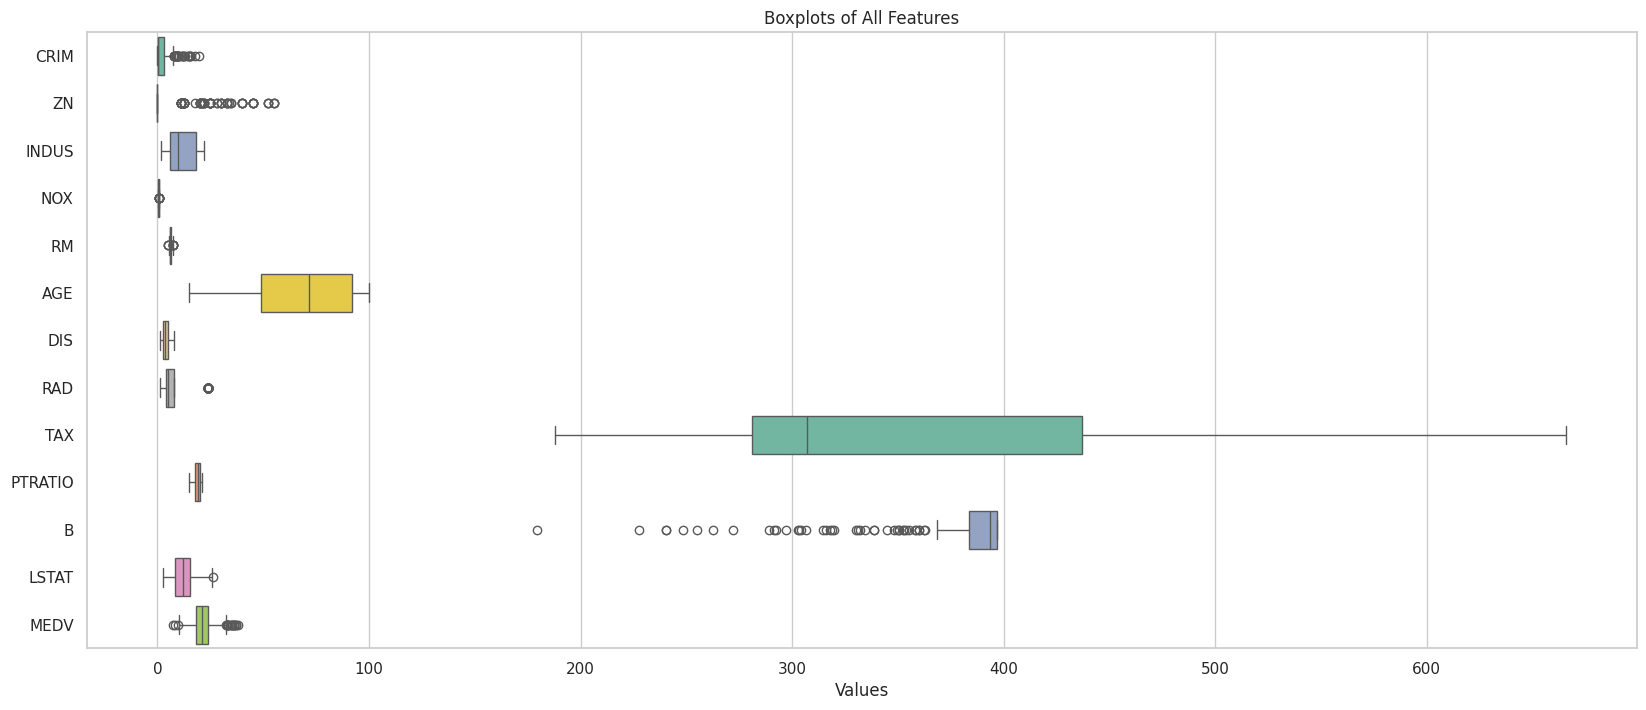

In [56]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df2, orient="h", palette="Set2")
plt.title('Boxplots of All Features')
plt.xlabel('Values')
plt.show()

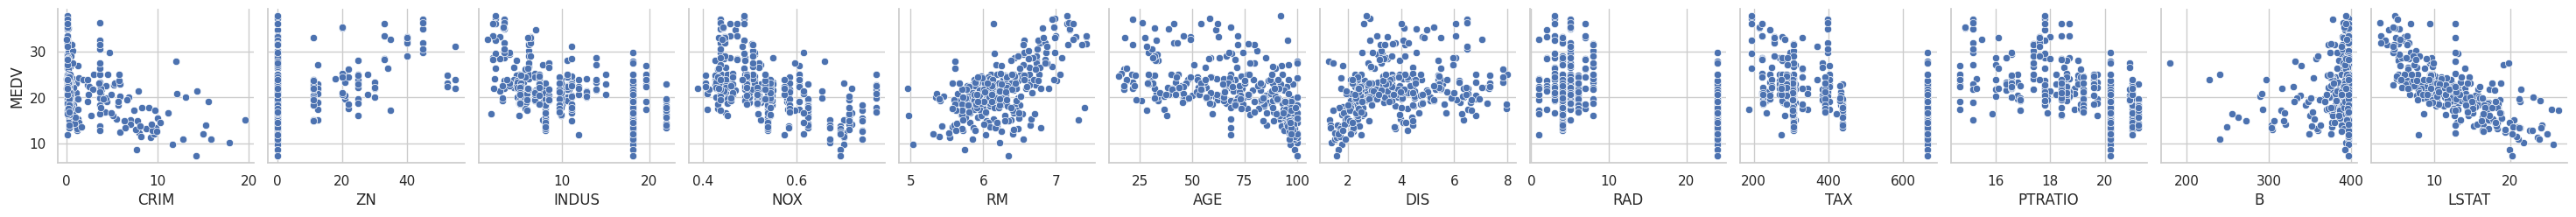

In [57]:
sns.pairplot(df2, x_vars=df2.columns[:-1], y_vars=['MEDV'])
plt.show()

In [59]:
#to make the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#scale data values for easier comparison
#x1 stores features excluding MEDV and converted to array for transformation
x1=df2.iloc[:,:-1]
x1=np.array(x1)
x1=scaler.fit_transform(x1)
y1=df2.iloc[:,-1]
y1=np.array(y1).reshape(-1,1)#reshaping done because 2d input is expected
y1=scaler.fit_transform(y1)

In [64]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1,y1, test_size=0.4, random_state=42)
#test taken 30 percent of the data set,random state used for reusability and for consistency in further usages.

In [65]:
regressor=LinearRegression()
regressor.fit(x1_train,y1_train)

LinearRegression()

In [66]:
y1_predict=regressor.predict(x1_test)

In [71]:

"""The R-squared (R2) score, also known as the coefficient of determination,
is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
 It's a common evaluation metric used in regression analysis to assess the goodness of fit of a regression model."""
r2_score(y1_test,y1_predict)*100

77.68577253540975

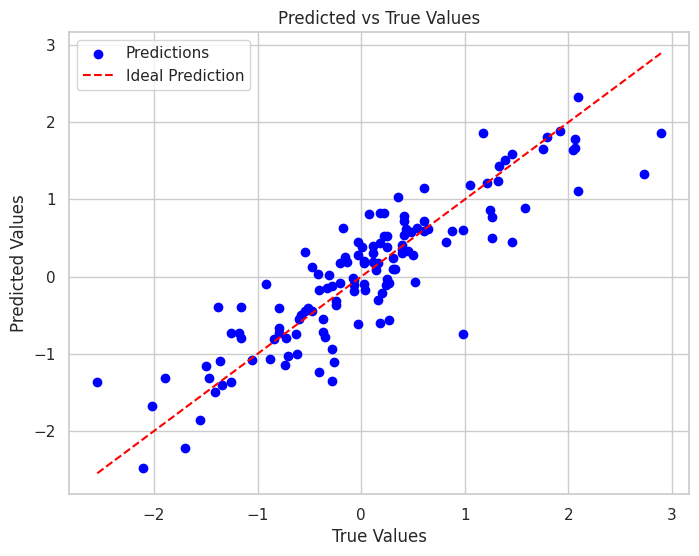

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_predict, color='blue', label='Predictions')
# Plotting the diagonal line (y_true = y_pred)
max_val = max(np.max(y1_test), np.max(y1_predict))
min_val = min(np.min(y1_test), np.min(y1_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')
# Adding labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)

plt.show()